In [77]:
import sys
import random

import numpy as np
import pygame
import scripts as s

import matplotlib.pyplot as plt
import importlib

importlib.reload(s)

<module 'scripts' from '/Users/alfred/Documents/interpolation/scripts.py'>

In [27]:
keyframe_x = np.random.randint(0, 800, size=(4,))
keyframe_y = np.random.randint(0, 600, size=(4,))
keyframe_x, keyframe_y

(array([308, 696, 282,   0]), array([593,  30, 335, 366]))

In [28]:
interpolation_count = 20

In [29]:
L = np.linspace([0, 0, 0, 0], [1, 1, 1, 1], num=interpolation_count)
L

array([[0.        , 0.        , 0.        , 0.        ],
       [0.05263158, 0.05263158, 0.05263158, 0.05263158],
       [0.10526316, 0.10526316, 0.10526316, 0.10526316],
       [0.15789474, 0.15789474, 0.15789474, 0.15789474],
       [0.21052632, 0.21052632, 0.21052632, 0.21052632],
       [0.26315789, 0.26315789, 0.26315789, 0.26315789],
       [0.31578947, 0.31578947, 0.31578947, 0.31578947],
       [0.36842105, 0.36842105, 0.36842105, 0.36842105],
       [0.42105263, 0.42105263, 0.42105263, 0.42105263],
       [0.47368421, 0.47368421, 0.47368421, 0.47368421],
       [0.52631579, 0.52631579, 0.52631579, 0.52631579],
       [0.57894737, 0.57894737, 0.57894737, 0.57894737],
       [0.63157895, 0.63157895, 0.63157895, 0.63157895],
       [0.68421053, 0.68421053, 0.68421053, 0.68421053],
       [0.73684211, 0.73684211, 0.73684211, 0.73684211],
       [0.78947368, 0.78947368, 0.78947368, 0.78947368],
       [0.84210526, 0.84210526, 0.84210526, 0.84210526],
       [0.89473684, 0.89473684,

In [30]:
U = np.power(L, range(3, -1, -1))
U

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.45793847e-04, 2.77008310e-03, 5.26315789e-02, 1.00000000e+00],
       [1.16635078e-03, 1.10803324e-02, 1.05263158e-01, 1.00000000e+00],
       [3.93643388e-03, 2.49307479e-02, 1.57894737e-01, 1.00000000e+00],
       [9.33080624e-03, 4.43213296e-02, 2.10526316e-01, 1.00000000e+00],
       [1.82242309e-02, 6.92520776e-02, 2.63157895e-01, 1.00000000e+00],
       [3.14914711e-02, 9.97229917e-02, 3.15789474e-01, 1.00000000e+00],
       [5.00072897e-02, 1.35734072e-01, 3.68421053e-01, 1.00000000e+00],
       [7.46464499e-02, 1.77285319e-01, 4.21052632e-01, 1.00000000e+00],
       [1.06283715e-01, 2.24376731e-01, 4.73684211e-01, 1.00000000e+00],
       [1.45793847e-01, 2.77008310e-01, 5.26315789e-01, 1.00000000e+00],
       [1.94051611e-01, 3.35180055e-01, 5.78947368e-01, 1.00000000e+00],
       [2.51931768e-01, 3.98891967e-01, 6.31578947e-01, 1.00000000e+00],
       [3.20309083e-01, 4.68144044e-01, 6.84210526e

In [31]:
M = np.array([[2, -2, 1, 1],
              [-3, 3, -2, -1],
              [0, 0, 1, 0],
              [1, 0, 0, 0]])

In [32]:
interpolated_x = U @ M @ keyframe_x[:, None]
interpolated_y = U @ M @ keyframe_y[:, None]


In [33]:
interpolated_x[0, 0]

308.0

In [35]:
pygame.init()

width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption('Point Drawing Example')

while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()

    screen.fill((255, 255, 255))

    for i in range(interpolated_x.shape[0]):
        pygame.draw.circle(screen, (0, 0, 0), (float(interpolated_x[i, 0]), float(interpolated_y[i, 0])), 2)


    pygame.display.flip()

SystemExit: 

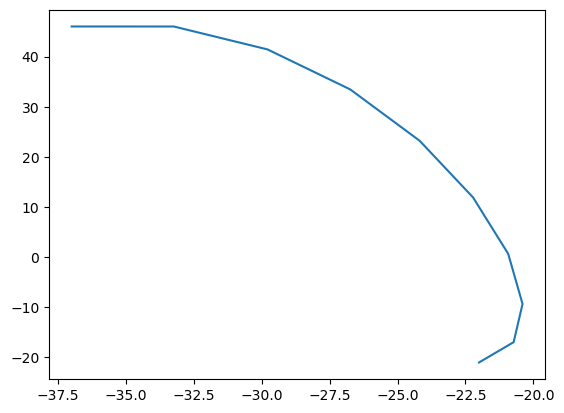

In [19]:
plt.plot(interpolated_x, interpolated_y)

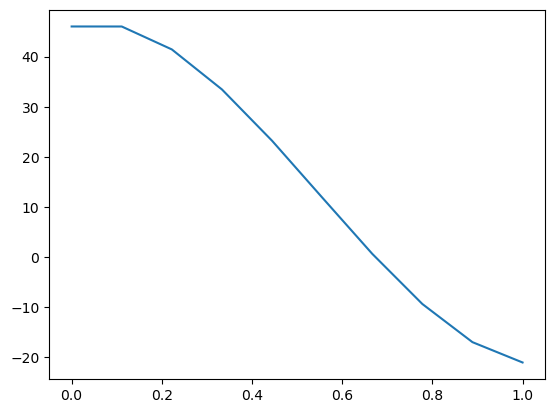

In [20]:
plt.plot(np.linspace(0, 1, num=interpolation_count), s.cubic_interpolation(keyframe_y[:2], keyframe_y[2:], M, interpolation_count=interpolation_count))

In [27]:
s.cubic_interpolation(
    keyframe_y[:2], keyframe_y[2:], M, interpolation_count=interpolation_count)

array([[ 18.        ],
       [ 19.06584362],
       [ 16.42798354],
       [ 11.        ],
       [  3.69547325],
       [ -4.57201646],
       [-12.88888889],
       [-20.34156379],
       [-26.01646091],
       [-29.        ]])

In [28]:
y = s.cubic_interpolation(np.random.randint(-100, 100, size=(10,)), np.random.randint(-100, 100, size=(10,)), M)

In [29]:
y.shape

(100, 9)

In [30]:
np.linspace(range(9), range(1, 10), interpolation_count)

array([[0.        , 1.        , 2.        , 3.        , 4.        ,
        5.        , 6.        , 7.        , 8.        ],
       [0.11111111, 1.11111111, 2.11111111, 3.11111111, 4.11111111,
        5.11111111, 6.11111111, 7.11111111, 8.11111111],
       [0.22222222, 1.22222222, 2.22222222, 3.22222222, 4.22222222,
        5.22222222, 6.22222222, 7.22222222, 8.22222222],
       [0.33333333, 1.33333333, 2.33333333, 3.33333333, 4.33333333,
        5.33333333, 6.33333333, 7.33333333, 8.33333333],
       [0.44444444, 1.44444444, 2.44444444, 3.44444444, 4.44444444,
        5.44444444, 6.44444444, 7.44444444, 8.44444444],
       [0.55555556, 1.55555556, 2.55555556, 3.55555556, 4.55555556,
        5.55555556, 6.55555556, 7.55555556, 8.55555556],
       [0.66666667, 1.66666667, 2.66666667, 3.66666667, 4.66666667,
        5.66666667, 6.66666667, 7.66666667, 8.66666667],
       [0.77777778, 1.77777778, 2.77777778, 3.77777778, 4.77777778,
        5.77777778, 6.77777778, 7.77777778, 8.77777778],


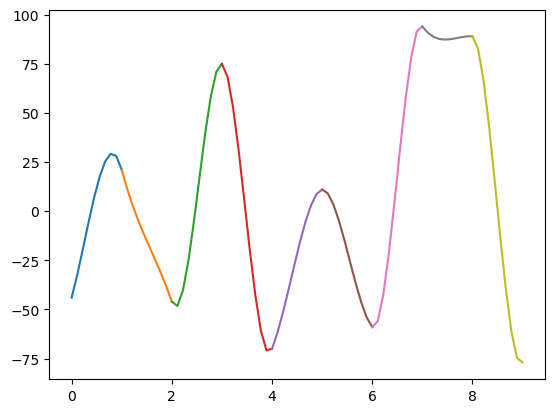

In [31]:
plt.plot(np.linspace(range(9), range(1, 10), interpolation_count), s.cubic_interpolation(np.random.randint(-100, 100, size=(10,)), np.random.randint(-100, 100, size=(10,)), M, interpolation_count=interpolation_count))

# try it on a smaller example and check that it is really correct! print out all the arrays and stuff.

In [32]:
M = np.array([[2, -2, 1, 1],
              [-3, 3, -2, -1],
              [0, 0, 1, 0],
              [1, 0, 0, 0]])
interpolation_count = 100
keyframes = np.random.randint(-100, 101, size=(4,))
number_of_keyframes = keyframes.shape[0]
gradients = np.random.randint(-100, 101, size=(4,))
x = np.linspace(range(number_of_keyframes - 1), range(1, number_of_keyframes), num=interpolation_count)
interpolated_points = s.cubic_interpolation(keyframes, gradients, M, interpolation_count)

In [33]:
keyframes, gradients, x, interpolated_points

(array([ 33,  93,  71, -65]),
 array([-13, -77, -51,  21]),
 array([[0.        , 1.        , 2.        ],
        [0.01010101, 1.01010101, 2.01010101],
        [0.02020202, 1.02020202, 2.02020202],
        [0.03030303, 1.03030303, 2.03030303],
        [0.04040404, 1.04040404, 2.04040404],
        [0.05050505, 1.05050505, 2.05050505],
        [0.06060606, 1.06060606, 2.06060606],
        [0.07070707, 1.07070707, 2.07070707],
        [0.08080808, 1.08080808, 2.08080808],
        [0.09090909, 1.09090909, 2.09090909],
        [0.1010101 , 1.1010101 , 2.1010101 ],
        [0.11111111, 1.11111111, 2.11111111],
        [0.12121212, 1.12121212, 2.12121212],
        [0.13131313, 1.13131313, 2.13131313],
        [0.14141414, 1.14141414, 2.14141414],
        [0.15151515, 1.15151515, 2.15151515],
        [0.16161616, 1.16161616, 2.16161616],
        [0.17171717, 1.17171717, 2.17171717],
        [0.18181818, 1.18181818, 2.18181818],
        [0.19191919, 1.19191919, 2.19191919],
        [0.2020202 ,

In [34]:
np.stack((np.ones(shape=(number_of_keyframes,)), gradients), axis=0)

array([[  1.,   1.,   1.,   1.],
       [-13., -77., -51.,  21.]])

In [35]:
np.linalg.norm(np.stack((np.ones(shape=(number_of_keyframes,)), gradients)), axis=0)

array([13.03840481, 77.00649323, 51.00980298, 21.02379604])

In [36]:
n = np.linalg.norm(np.stack((np.ones(shape=(number_of_keyframes,)), gradients)), axis=0)
n

array([13.03840481, 77.00649323, 51.00980298, 21.02379604])

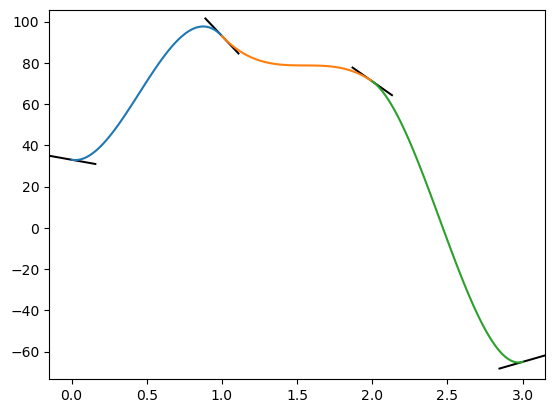

In [37]:
plt.plot(x, interpolated_points)

plt.quiver(range(number_of_keyframes), keyframes, np.ones(shape=(number_of_keyframes,)) / n, gradients / n, angles='xy', pivot='mid', scale_units='x', scale=3, units='dots', width=2, headwidth=0, headlength=0, headaxislength=0)

In [38]:
points = np.random.randint(-100, 100, size=(2,))
gradients = np.random.randint(-100, 100, size=(2,))
points, gradients

(array([-45, -15]), array([-92,  63]))

In [39]:
np.linspace(range(1), range(1, 2), num=4), s.cubic_interpolation(points, gradients, M, 4)

(array([[0.        ],
        [0.33333333],
        [0.66666667],
        [1.        ]]),
 array([[-45.        ],
        [-55.51851852],
        [-38.92592593],
        [-15.        ]]))

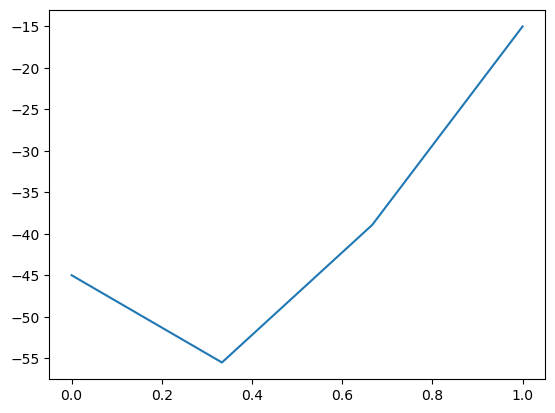

In [40]:
plt.plot(np.linspace(range(1), range(1, 2), num=4), s.cubic_interpolation(points, gradients, M, 4))

In [41]:
np.column_stack((np.ones_like(np.arange(9)), np.arange(9)))

array([[1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7],
       [1, 8]])

In [42]:
arr = np.arange(9)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [43]:
arr[:-1]

array([0, 1, 2, 3, 4, 5, 6, 7])

In [44]:
arr[1:]

array([1, 2, 3, 4, 5, 6, 7, 8])

In [45]:
np.stack((arr[:-1], arr[1:]), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8]])

In [46]:
arr.reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [47]:
arr.reshape(3, 3).reshape(-1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [48]:
arr.reshape(3, 3).reshape(-1, order='F')

array([0, 3, 6, 1, 4, 7, 2, 5, 8])

keyframes are: 
[-44.72770834  44.14331803  95.89981658 -89.1984659  -41.52442255
  38.95997004  55.25551443 -95.34441977  -9.29853889   5.64328862]
gradients are: 
[-14.01982151 -50.41053161 -36.84692703  18.54697237  92.93781282
 -83.7524152   98.86544376 -20.19881172  43.56165232  10.15751738]


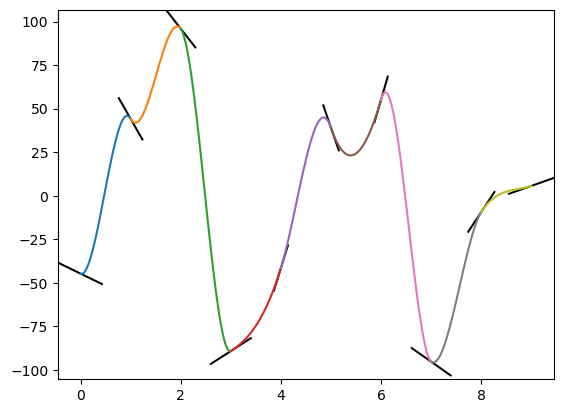

In [72]:
# importlib.reload(s)
hermite = np.array([[2, -2, 1, 1],
                    [-3, 3, -2, -1],
                    [0, 0, 1, 0],
                    [1, 0, 0, 0]])
interpolation_count = 50
number_of_keyframes = 10
keyframes = 200 * np.random.random_sample(number_of_keyframes) - 100
gradients = 200 * np.random.random_sample(number_of_keyframes) - 100
s.plot_interpolation(keyframes, gradients, s.cubic_interpolation(keyframes, gradients, hermite, interpolation_count))
print("keyframes are: \n"
      f"{keyframes}\n"
      "gradients are: \n"
      f"{gradients}")


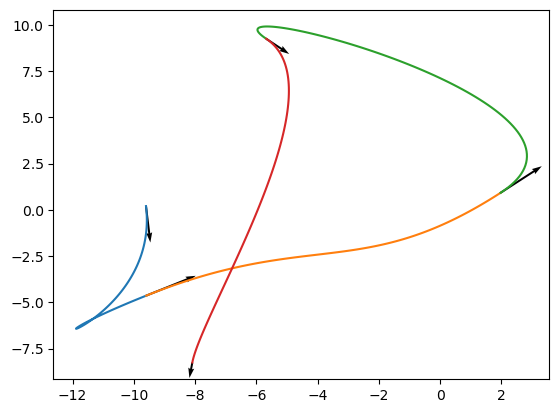

In [70]:
interpolation_count = 100
number_of_points = 5
keyframes_x = 20 * np.random.random_sample(number_of_points) - 10
keyframes_y = 20 * np.random.random_sample(number_of_points) - 10
gradients_x = 40 * np.random.random_sample(number_of_points) - 20
gradients_y = 40 * np.random.random_sample(number_of_points) - 20

plt.plot(s.hermite_interpolation_1d(keyframes_x, gradients_x, interpolation_count), 
 s.hermite_interpolation_1d(keyframes_y, gradients_y, interpolation_count))

# plt.scatter(keyframes_x, keyframes_y)

plt.quiver(keyframes_x, keyframes_y, gradients_x, gradients_y,
           angles='xy', scale_units='xy', scale=10, 
           units='dots', width=2)


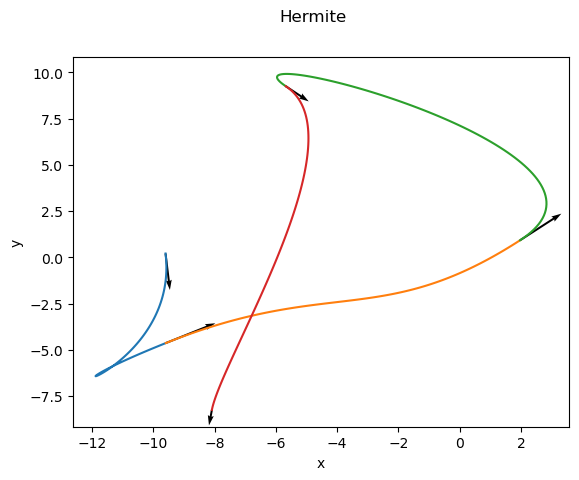

In [78]:
s.plot_interpolation_2d(keyframes_x, keyframes_y, gradients_x, gradients_y, s.hermite_interpolation_1d(keyframes_x, gradients_x, interpolation_count), s.hermite_interpolation_1d(keyframes_y, gradients_y, interpolation_count), "Hermite")